<a href="https://colab.research.google.com/github/arpan000/Kidney-disease-prediction-using-ML/blob/main/Kidney_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing Dependencies

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #for analysis
from sklearn.preprocessing import LabelEncoder #to encode a datatype to another one

In [26]:
data = pd.read_csv('/content/kidney_disease.csv')

In [27]:
# make copy of data
df = data.copy()
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


2. Analyzing Features

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


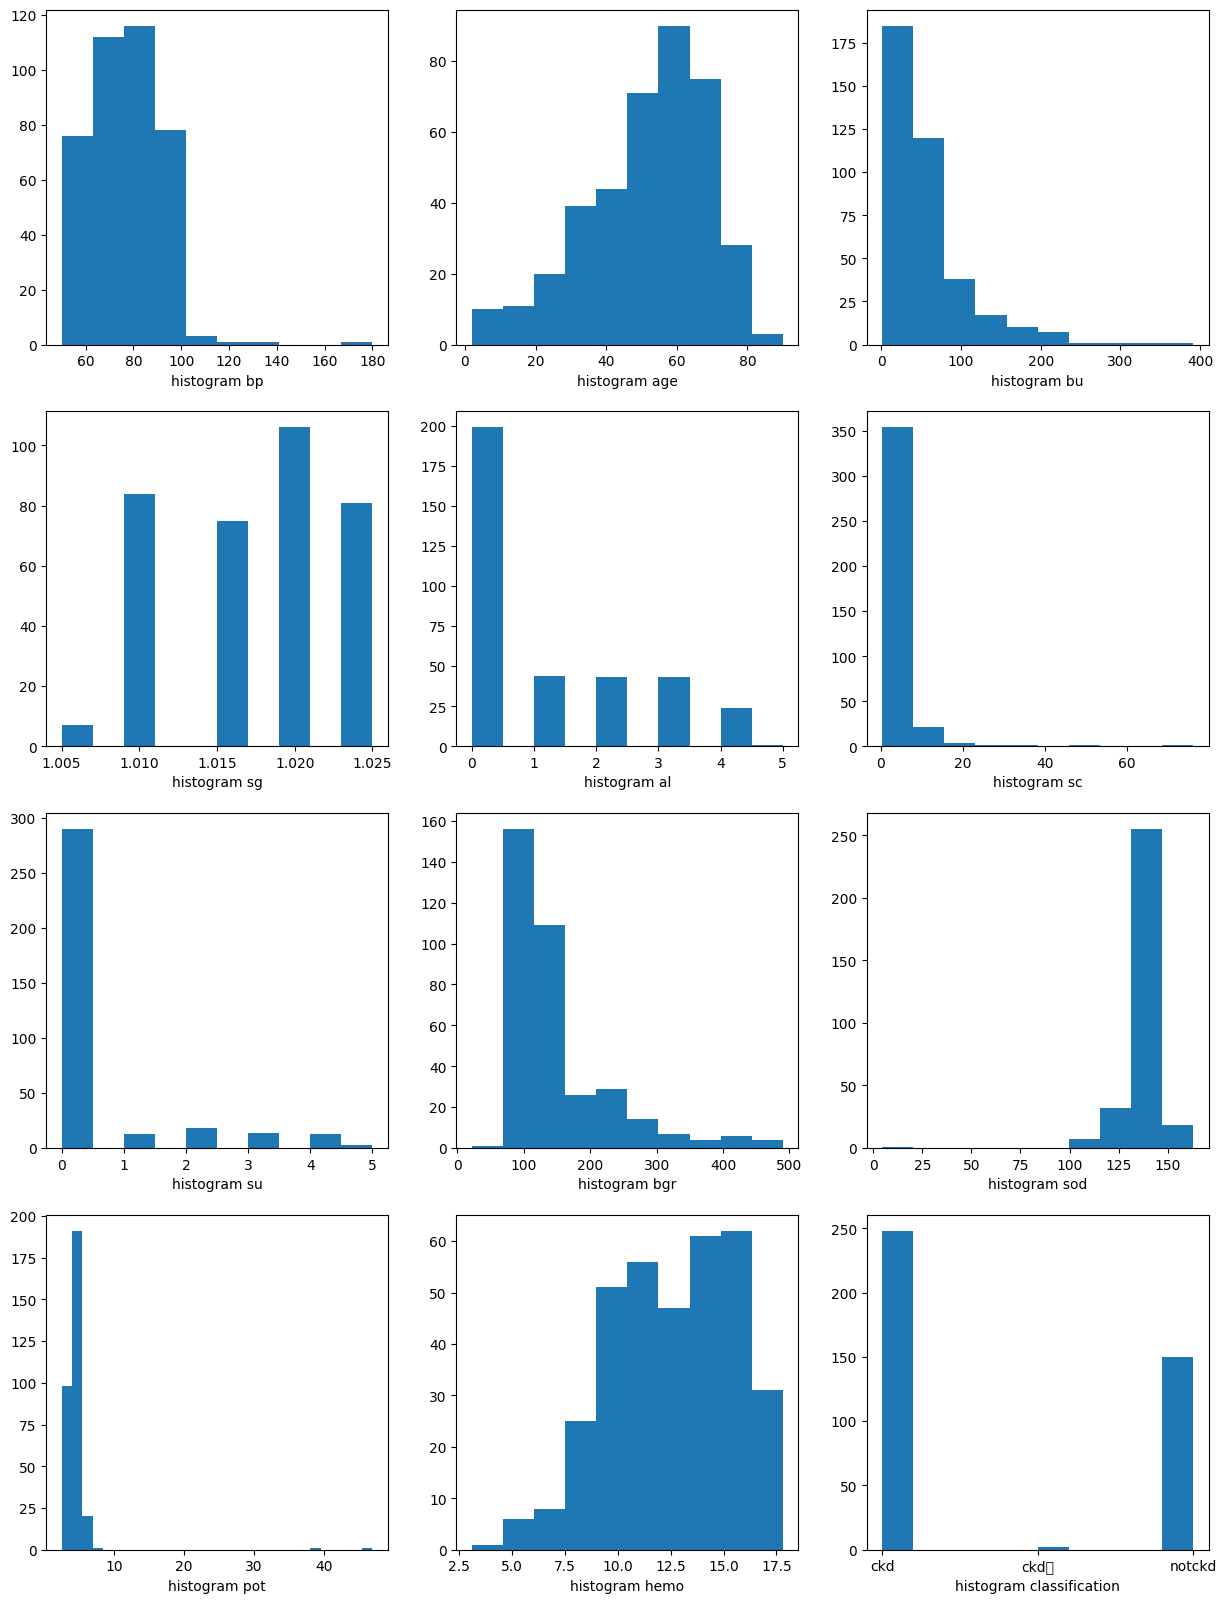

In [28]:
figure, axe = plt.subplots(4,3,figsize=(15, 20))
axe[0,0].hist(df['bp'])
axe[0,0].set_xlabel("histogram bp")
axe[0,1].hist(df['age'])
axe[0,1].set_xlabel("histogram age")
axe[0,2].hist(df['bu'])
axe[0,2].set_xlabel("histogram bu")

axe[1,0].hist(df["sg"])
axe[1,0].set_xlabel("histogram sg")
axe[1,1].hist(df["al"])
axe[1,1].set_xlabel("histogram al")
axe[1,2].hist(df["sc"])
axe[1,2].set_xlabel("histogram sc")

axe[2,0].hist(df["su"])
axe[2,0].set_xlabel("histogram su")
axe[2,1].hist(df["bgr"])
axe[2,1].set_xlabel("histogram bgr")
axe[2,2].hist(df["sod"])
axe[2,2].set_xlabel("histogram sod")

axe[3,0].hist(df["pot"],bins=30)
axe[3,0].set_xlabel("histogram pot")
axe[3,1].hist(df["hemo"])
axe[3,1].set_xlabel("histogram hemo")
axe[3,2].hist(df["classification"])
axe[3,2].set_xlabel("histogram classification")


plt.show()


In [29]:
df.shape
print("\n")
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    o

In [30]:
# checking weather  'id' has duplicate values or not, bcz 'is' is our key :
df['id'].duplicated().sum()

0

In [31]:
# checking missing data in our dataset
df.isnull().sum()

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [32]:
#Analyzing the whore dataset
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [33]:
df.describe().columns


Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo'],
      dtype='object')

In [34]:
# fill null values by mean
df['age'].fillna(df['age'].mean(), inplace=True)
df['bp'].fillna(df['bp'].median(), inplace=True)
df['sg'].fillna(df['sg'].mean(), inplace=True)
df['al'].fillna(df['al'].median(), inplace=True)
df['su'].fillna(df['su'].median(), inplace=True)
df['rbc'].fillna(df['rbc'].mode()[0], inplace=True)
df['pc'].fillna(df['pc'].mode()[0] , inplace=True)
# filling missing values in column 'pcc' by 'notpresent' which is mode
df['pcc'].fillna(df['pcc'].mode()[0] ,inplace = True)
# filling missing values in column 'ba' by 'notpresent' which mode of ba
df['ba'].fillna(df['ba'].mode()[0],inplace = True)
df['bgr'].fillna(df['bgr'].median(), inplace=True)
df['bu'].fillna(df['bu'].mean(), inplace=True)
df['sc'].fillna(df['sc'].mean(),inplace=True)
df['sod'].fillna(df['sod'].mean(), inplace=True)
df['pot'].fillna(df['pot'].mean(), inplace=True)
df['hemo'].fillna(df['hemo'].mean(), inplace=True)
# Convert 'pcv' column to numeric data type
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['pcv'].fillna(df['pcv'].mean(), inplace=True)
# convert 'wc' column datatype to numeric data type
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['wc'].fillna(df['wc'].mean(), inplace=True)
# change 'rc' to numeric data type
df['rc'] = pd.to_numeric(df['rc'], errors= 'coerce')
df['rc'].fillna(df['rc'].mean(), inplace=True)
df['htn'].fillna(df['htn'].mode()[0] ,inplace=True)
df['dm'].fillna(df['dm'].mode()[0], inplace=True)
df['cad'].fillna(df['cad'].mode()[0], inplace=True)
df['appet'].fillna(df['appet'].mode()[0], inplace=True)
df['pe'].fillna(df['pe'].mode()[0], inplace=True)
df['ane'].fillna(df['ane'].mode()[0], inplace=True)


4. Feature Selection

In [35]:

# drop numeric columns and take only categorical data columns
df1 = df.drop(df.describe().columns, axis=1)
df1.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [36]:
# label encoding the categorical data
lab = LabelEncoder()
catColumns = ['appet','ba','pc','ane','pe','cad','rbc','dm','pcc','htn','classification']

for i in catColumns:
    df1[i]= lab.fit_transform(df1[i])


In [37]:

df1.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

1. Here we have 1 ordinal categorical data column 'appet'


2. Target column 'classification'


3. all other 9 columns are nominal categorical data columns

In [38]:
df_final=df1
print(df_final.columns)
print(df_final.shape)

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')
(400, 11)


In [39]:
df_final.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

In [40]:
from sklearn.model_selection import train_test_split

X = df_final.iloc[:, :-1].values
y = df_final.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print(X.shape, y.shape)
print(X_train[:5, :])
print(y_train[:5])

(400, 10) (400,)
[[0 0 1 0 1 4 2 1 0 0]
 [1 1 0 0 1 4 1 0 0 1]
 [1 1 0 0 0 3 1 0 0 0]
 [1 0 1 0 0 3 1 0 0 0]
 [1 1 0 0 0 3 1 0 0 0]]
[0 0 2 0 2]


In [41]:
df_final.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,1,1,0,0,1,4,1,0,0,0,0
1,1,1,0,0,0,3,1,0,0,0,0
2,1,1,0,0,0,4,1,1,0,1,0
3,1,0,1,0,1,3,1,1,1,1,0
4,1,1,0,0,0,3,1,0,0,0,0


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics # for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [43]:
# checking model accuracy, mae, rme, rmse, and generate classification report
def prediction_plot(model,X_train, X_test, y_train, y_test):
    y_pred = model.predict(X_test)
    df_ans = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
    print(df_ans)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print(classification_report(y_test, y_pred))
# confusion matrix plot
def conf(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.set_xlabel('Predicted outputs', color='black')
    ax.set_ylabel('Actual outputs',  color='black')
    ax.xaxis.set(ticks=range(2))
    ax.yaxis.set(ticks=range(2))
    # ax.set_ylim(9.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
    plt.show()

5. FITTING INTO MODEL

    Actual  Predicted
0        2          2
1        2          2
2        0          0
3        0          0
4        2          2
..     ...        ...
75       2          2
76       0          0
77       2          2
78       0          0
79       0          0

[80 rows x 2 columns]
Accuracy: 0.975
Mean Absolute Error: 0.05
Mean Squared Error: 0.1
Root Mean Squared Error: 0.31622776601683794
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        41
           2       0.95      1.00      0.97        39

    accuracy                           0.97        80
   macro avg       0.98      0.98      0.97        80
weighted avg       0.98      0.97      0.97        80



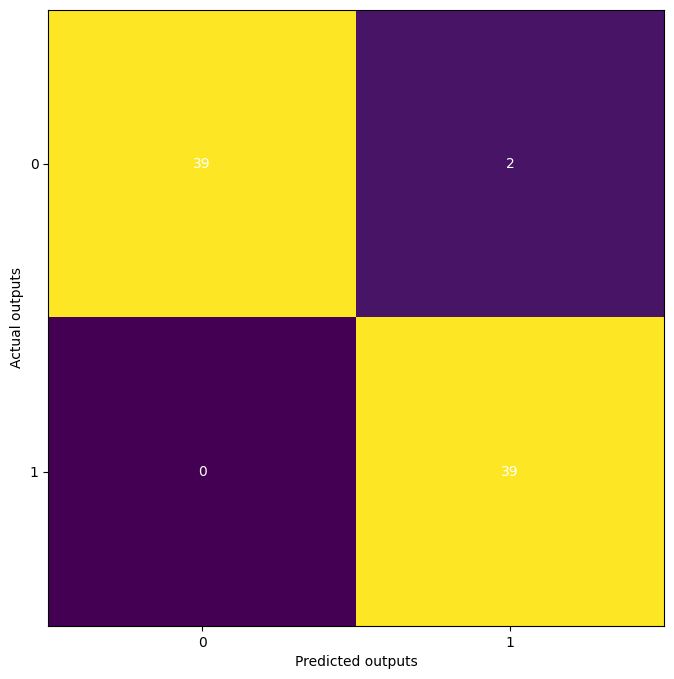

In [44]:
#---------------------------------------KNN-----------------------------------------
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
prediction_plot(model,X_train, X_test, y_train, y_test)
conf(y_test, y_pred)

    Actual  Predicted
0        2          2
1        2          2
2        0          0
3        0          0
4        2          2
..     ...        ...
75       2          2
76       0          2
77       2          2
78       0          0
79       0          0

[80 rows x 2 columns]
Accuracy: 0.95
Mean Absolute Error: 0.1
Mean Squared Error: 0.2
Root Mean Squared Error: 0.4472135954999579
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        41
           2       0.91      1.00      0.95        39

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



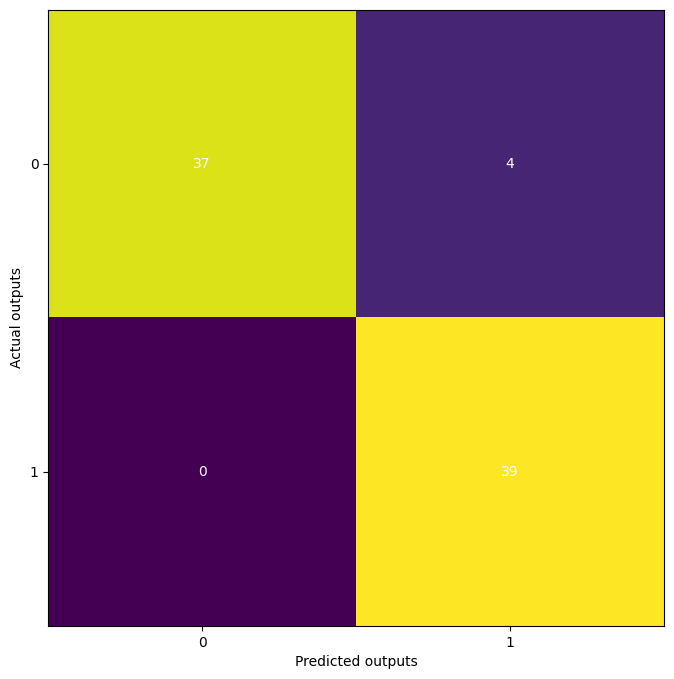

In [45]:

#-----------------------------------Logistic Regression--------------------------------------
model= LogisticRegression(random_state=0, max_iter= 1000)
history = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
prediction_plot(model,X_train, X_test, y_train, y_test)
conf(y_test, y_pred)

    Actual  Predicted
0        2          2
1        2          2
2        0          0
3        0          0
4        2          2
..     ...        ...
75       2          2
76       0          0
77       2          2
78       0          0
79       0          0

[80 rows x 2 columns]
Accuracy: 0.975
Mean Absolute Error: 0.05
Mean Squared Error: 0.1
Root Mean Squared Error: 0.31622776601683794
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        41
           2       0.95      1.00      0.97        39

    accuracy                           0.97        80
   macro avg       0.98      0.98      0.97        80
weighted avg       0.98      0.97      0.97        80



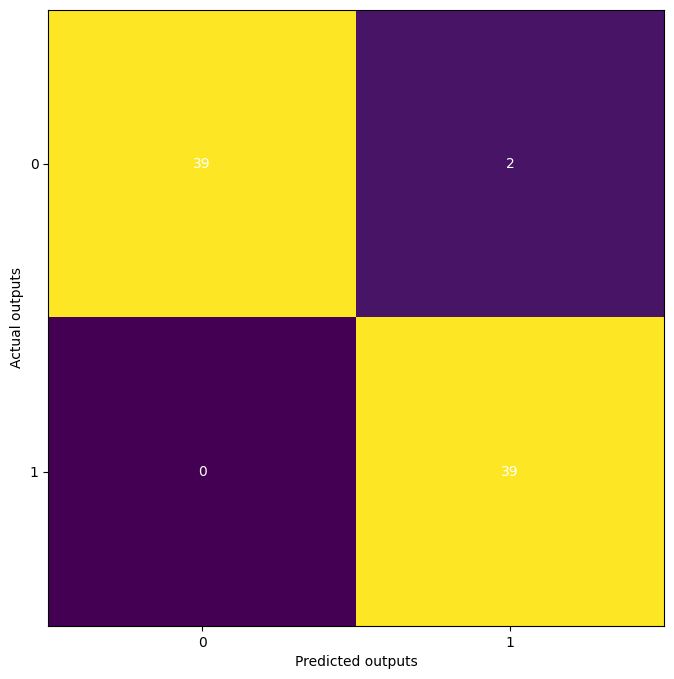

In [46]:
#------------------------------------------Decision Tree----------------------------------------
model= DecisionTreeClassifier(random_state=0)
history = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
prediction_plot(model,X_train, X_test, y_train, y_test)
conf(y_test, y_pred)
